<a href="https://colab.research.google.com/github/sakshii9/Machine-Learning-Projects/blob/main/Project03_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


### **Data Analysis**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv')

In [ ]:
df.head(10)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K
5,34,Male,Private,10th,Never-married,Other-service,Not-in-family,White,United-States,<=50K
6,29,Male,?,HS-grad,Never-married,?,Unmarried,Black,United-States,<=50K
7,63,Male,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,United-States,>50K
8,24,Female,Private,Some-college,Never-married,Other-service,Unmarried,White,United-States,<=50K
9,55,Male,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,United-States,<=50K


In [ ]:
df.tail(10)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
48832,32,Male,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,United-States,<=50K
48833,43,Male,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,United-States,<=50K
48834,32,Male,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Taiwan,<=50K
48835,53,Male,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,United-States,>50K
48836,22,Male,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,United-States,<=50K
48837,27,Female,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States,<=50K
48838,40,Male,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States,>50K
48839,58,Female,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States,<=50K
48840,22,Male,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States,<=50K
48841,52,Female,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,United-States,>50K


In [ ]:
df.describe()

,Age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB



1. Data Frame has 10 columns,
1 column(int64Dtype) and 9 columns are  (object Dtype)

2. Some columns have value as '?',
Finding how many columns have '?'


In [ ]:
df.isin(['?']).sum()

Age                 0
Gender              0
WorkingClass     2799
Education           0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
NativeCountry     857
Income              0
dtype: int64


*  'WorkingClass' column has 2799 '?'
*  'Occupation' column has 2809 '?'
*  'NativeCountry' column has 857 '?'
* So to convert '?' into NaN






In [ ]:
df['WorkingClass'] =df['WorkingClass'].replace('?',np.nan)
df['Occupation'] =df['Occupation'].replace('?',np.nan)
df['NativeCountry'] =df['NativeCountry'].replace('?',np.nan)


* Checking again for '?'




In [ ]:
df.isin(['?']).sum()

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64


▶ All '?' successfully converted "?" into NaN










Checking Null Values

In [ ]:
df.isnull().sum()

Age                 0
Gender              0
WorkingClass     2799
Education           0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
NativeCountry     857
Income              0
dtype: int64

In [ ]:
percent_missing =df.isnull().sum()*100/len(df)
percent_missing

Age              0.000000
Gender           0.000000
WorkingClass     5.730724
Education        0.000000
MaritalStatus    0.000000
Occupation       5.751198
Relationship     0.000000
Race             0.000000
NativeCountry    1.754637
Income           0.000000
dtype: float64

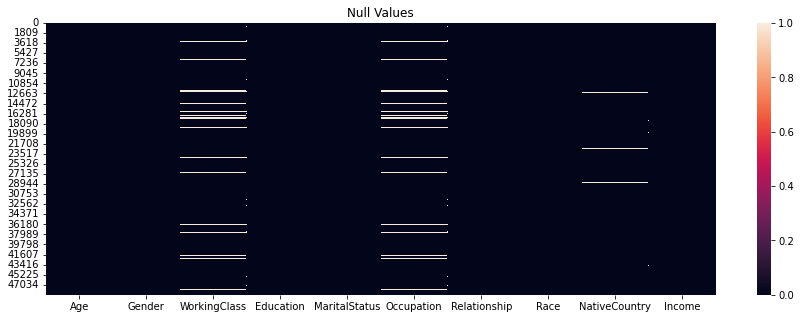

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna())
plt.title('Null Values')
plt.show()


* 2799-5.73% null values in 'WorkingClass' column
*  2809-5.75% null values in 'Occupation'column
*  457-1.75% null values in 'NativeCountry'column
*  So we can drop all those null values






**Droping all the Missing Values**

In [ ]:
df.dropna(how='any', inplace=True)



*   Check for null values



In [ ]:
df.isnull().sum()

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64

**Check for Duplicate Values**

In [ ]:
print(f"We have {df.duplicated().sum()} duplicate values")

We have 15777 duplicate values


Drop Duplicate Values

In [ ]:
df= df.drop_duplicates()
print(f"After dropping duplicate values,now we have {df.duplicated().sum()} duplicate values")

After dropping duplicate values,now we have 0 duplicate values


**Check descriptive statistics-Numerical Columns**

In [ ]:
df.describe()

,Age
count,29445.000000
mean,40.325998
std,13.475846
min,17.000000
25%,30.000000
50%,39.000000
75%,49.000000
max,90.000000


**Check descriptive statistics -Categorial Columns**

In [ ]:
df.describe(exclude='number')

,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
count,29445,29445,29445,29445,29445,29445,29445,29445,29445
unique,2,7,16,7,14,6,5,41,2
top,Male,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,United-States,<=50K
freq,18644,19501,8447,12279,4103,10235,23529,25585,22709


### **Univariate Analysis**

In [ ]:
df['Age'].describe()

count    29445.000000
mean        40.325998
std         13.475846
min         17.000000
25%         30.000000
50%         39.000000
75%         49.000000
max         90.000000
Name: Age, dtype: float64

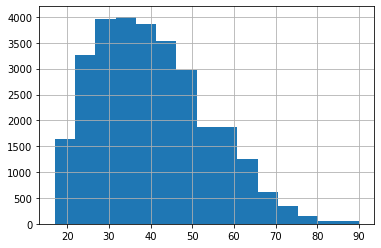

In [ ]:
df['Age'].hist(bins=15)

Find Total number of people having age between 23 To 60 (Inclusive)

In [ ]:
print(f"Total number of people having age between 23 To 60 : {len(df[df['Age'].between(17,50)])}")

Total number of people having age between 23 To 60 : 22668


**What is the distribution of WorkingClass column**?

In [ ]:
df['WorkingClass'].describe()

count       29445
unique          7
top       Private
freq        19501
Name: WorkingClass, dtype: object

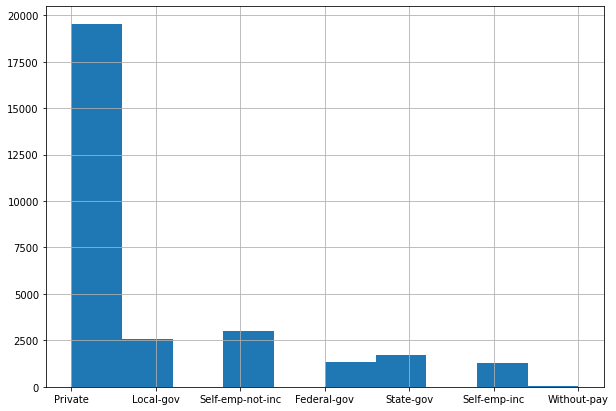

In [ ]:
plt.figure(figsize=(10,7))
df['WorkingClass'].hist()

▶Most of the employees are from 'Private' sector

**How many people have bachelors and masters degree?**

In [ ]:
print(f"{len(df[df['Education'].isin(['Bachelors', 'Masters'])])} : people have bachelors and masters degree")

6317 : people have bachelors and masters degree


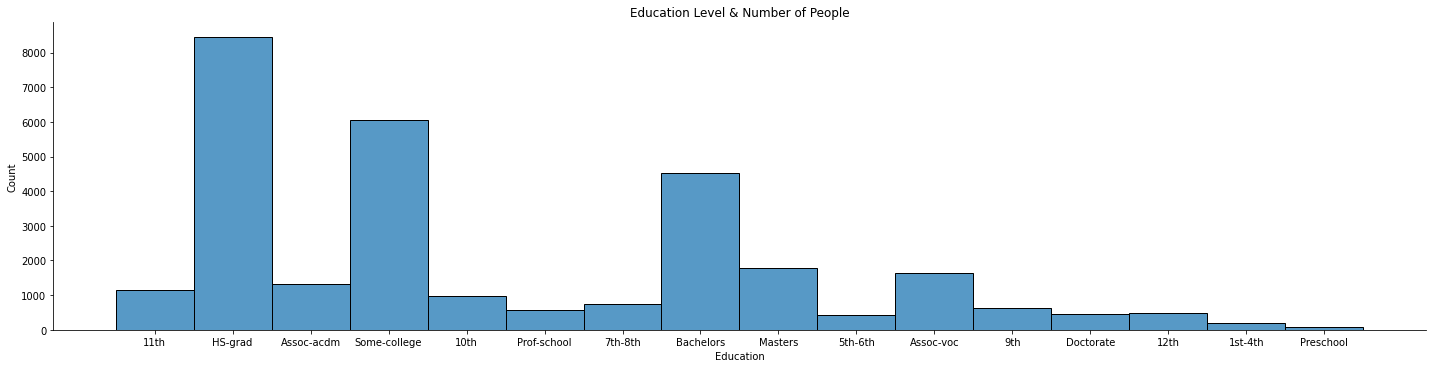

In [ ]:
sns.displot(x=df['Education'], aspect=4)
plt.title('Education Level & Number of People')
plt.show()

### **Bivariate Analysis**

**Relationship between Income and Age**

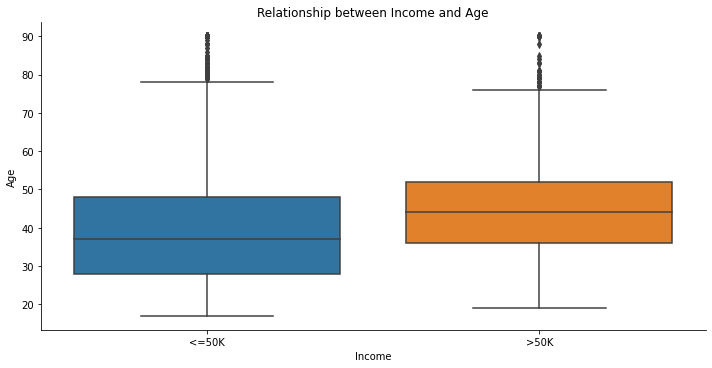

In [ ]:
sns.catplot(data=df, x='Income', y='Age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()


*  Most of the people having income less than or equalto 50k are between age 25-24
*  Most of the people having income more than 50K are between age 37 -50



Replace salary values[<50k,50k]with 0 and 1

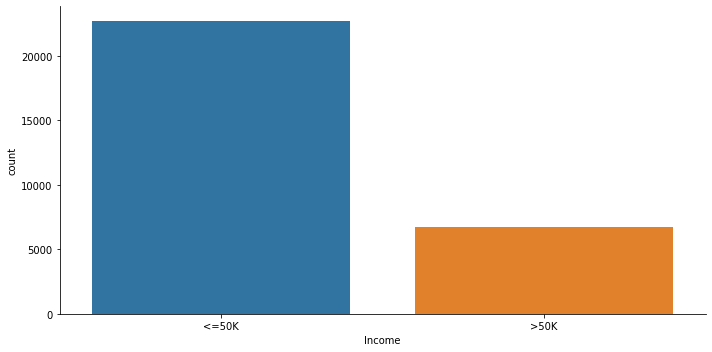

In [ ]:
sns.catplot(data=df, x='Income', kind= 'count', aspect=2)

**Method 1:**
creating a function to convert salary values

In [ ]:
def income_data(income):
    if income == '<=50K':
        return 0
    else:
        return 1

creating a separate column ['encode_income]

In [ ]:
df['encoded_Income'] = df['Income'].apply(income_data)
df.head(1)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income,encoded_Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K,0


We have succesfully added new column['encoded_income']with values 0 and 1 

**Method 02:**
using replace method 

In [ ]:
df.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)

In [ ]:
df.head(1)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income,encoded_Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,0,0


As we have successfully replaced income values with 0 and 1 in the same column.Now we can drop 'encoded_income'column

In [ ]:
df.drop(columns='encoded_Income', axis=1)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,0
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,0
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,1
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,1
5,34,Male,Private,10th,Never-married,Other-service,Not-in-family,White,United-States,0
...,...,...,...,...,...,...,...,...,...,...
48833,43,Male,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,United-States,0
48834,32,Male,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Taiwan,0
48837,27,Female,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States,0
48839,58,Female,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States,0


**Which WorkingClass has highest income?**

In [ ]:
df.groupby('WorkingClass')['Income'].mean().sort_values(ascending= False)

WorkingClass
Self-emp-inc        0.490421
Federal-gov         0.366412
Self-emp-not-inc    0.276709
Local-gov           0.266848
State-gov           0.254051
Private             0.187478
Without-pay         0.100000
Name: Income, dtype: float64

▶Self-emp-inc WorkingClass is getting the highest income

**Checking who has better chance to get income greater than 50K ,Male or Female?**

In [ ]:
df.groupby('Gender')['Income'].mean().sort_values(ascending=False)

Gender
Male      0.283952
Female    0.133506
Name: Income, dtype: float64

▶ So here 'Male' has better chance to get income greater than 50K

**Converting WorkingClass columns datatype to category**

In [ ]:
df['WorkingClass'] = df['WorkingClass'].astype('category')

In [ ]:
df.dtypes

Age                  int64
Gender              object
WorkingClass      category
Education           object
MaritalStatus       object
Occupation          object
Relationship        object
Race                object
NativeCountry       object
Income               int64
encoded_Income       int64
dtype: object

**Therefore ,dtype of ['WorkingClas']ccolumn is successfully changed**
